In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sentiment_df = pd.read_csv(r'C:\\Users\\Himika\\Desktop\\python\\task\\fear_greed_index.csv')
trader_df = pd.read_csv(r'C:\\Users\\Himika\\Desktop\\python\\task\\historical_data.csv')

In [4]:
print(sentiment_df.head())
print(trader_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [5]:
# Convert sentiment's 'date' column to datetime.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Convert trader's timestamp in milliseconds
trader_df['date'] = pd.to_datetime(trader_df['Timestamp'], unit='ms').dt.date

# Merge both datasets on date 
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='inner')


In [6]:
#count trades per sentiment
sentiment_counts = merged_df['classification'].value_counts()
print(sentiment_counts)

classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


C:\Users\Himika\AppData\Local\Temp\ipykernel_15740\403512259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='Set2')


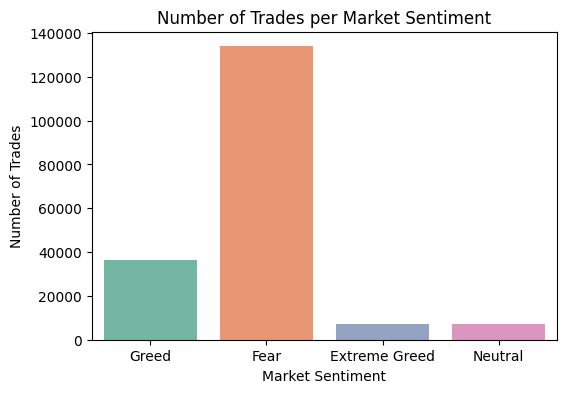

In [38]:
# sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='classification', palette='Set2')
plt.title("Number of Trades per Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

In [8]:
# Grouped mean and median Closed PnL
pnl_stats = merged_df.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
print(pnl_stats)

                 count   mean  median      std        min        max
classification                                                      
Extreme Greed     6962  25.42     0.0   306.17  -21524.40    2500.96
Fear            133871  50.05     0.0   909.12  -35681.75  135329.09
Greed            36289  87.89     0.0  1148.34 -117990.10   44223.45
Neutral           7141  22.23     0.0   633.70  -18360.67   18282.19


C:\Users\Himika\AppData\Local\Temp\ipykernel_15740\1152977888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')


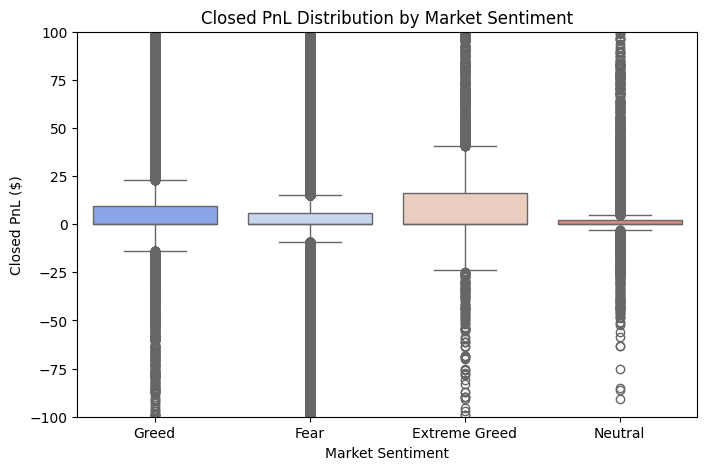

In [39]:
# Closed PnL by Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')
plt.title("Closed PnL Distribution by Market Sentiment")
plt.ylabel("Closed PnL ($)")
plt.xlabel("Market Sentiment")
plt.ylim(-100, 100)  # Adjust based on data range
plt.show()

In [11]:
print(merged_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification'],
      dtype='object')


In [12]:
# Summary for Size USD
volume_stats = merged_df.groupby('classification')['Size USD'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
print(volume_stats)

                 count     mean   median       std   min         max
classification                                                      
Extreme Greed     6962  5660.27  1148.64  11378.77  0.01   178200.00
Fear            133871  5259.98   605.07  30811.76  0.00  3509752.98
Greed            36289  3182.88   499.94  11454.69  0.00   814524.17
Neutral           7141  3058.85   554.16   8132.57  0.00   111779.98


C:\Users\Himika\AppData\Local\Temp\ipykernel_15740\494479767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Size USD', palette='viridis')


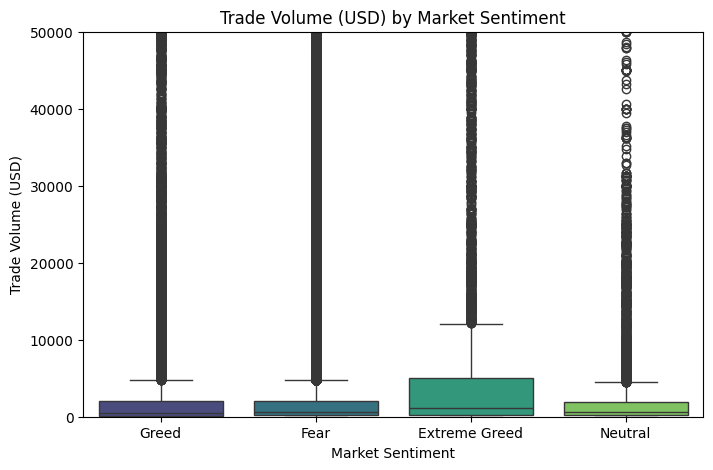

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Size USD', palette='viridis')
plt.title("Trade Volume (USD) by Market Sentiment")
plt.ylabel("Trade Volume (USD)")
plt.xlabel("Market Sentiment")
plt.ylim(0, 50000)  # Adjust based on your data
plt.show()

In [14]:
# Count of Buy/Sell per sentiment
buy_sell_counts = merged_df.groupby(['classification', 'Side']).size().unstack()
print(buy_sell_counts)

Side              BUY   SELL
classification              
Extreme Greed    3371   3591
Fear            66081  67790
Greed           15421  20868
Neutral          3505   3636


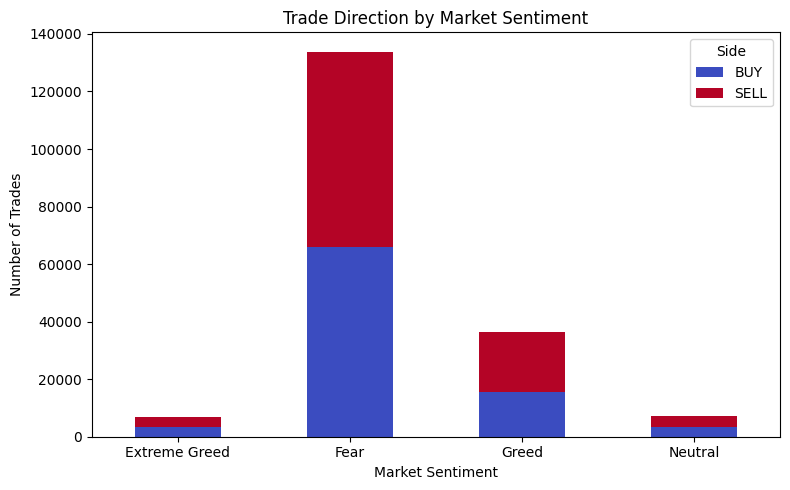

In [15]:
buy_sell_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Trade Direction by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title='Side')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
# Select only numerical columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['Execution Price', 'Size Tokens', 'Size USD', 'Start Position',
       'Closed PnL', 'Order ID', 'Fee', 'Trade ID', 'Timestamp'],
      dtype='object')


In [36]:
numeric_cols= numeric_cols.drop(['Timestamp','Trade ID','Order ID','Start Position'])

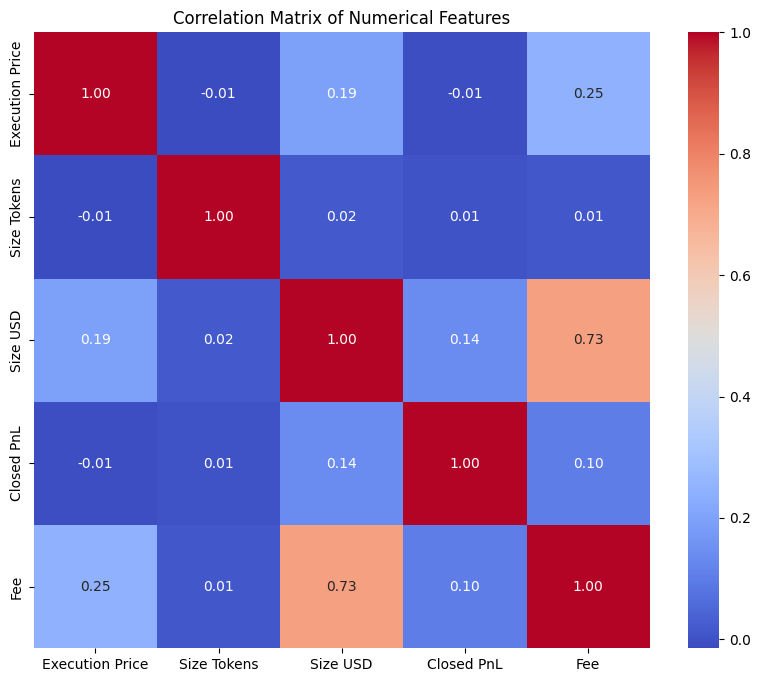

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()
